In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df1 = pd.read_csv('../datasets/all_ratings_cleaned.csv')
df1.head()

,track_id,track_lyrics,gpt_ratings,ratings_length,rating_counts,Clear,Relatable,Memorable,Engaging,Symbolic,Lyrical,Happy,Surprised,Fearful,Angry,Disgusted,Sad
0,0r7CVbZTWZgbTCYdfa2P31,Here's to the ones that we got\nCheers to the ...,9 8 9 8 7 9 7 6 5 4 5 8,23,12,9,8,9,8,7,9,7,6,5,4,5,8
1,1z1Hg7Vb0AhHDiEmnDE79l,Summertime and I'm caught in the feeling\nGett...,8 6 8 7 5 8 4 6 5 4 5 7,23,12,8,6,8,7,5,8,4,6,5,4,5,7
2,75FpbthrwQmzHlBJLuGdC7,Two kids with their hearts on fire\nWho's gonn...,9 8 9 8 7 9 8 6 5 4 5 8,23,12,9,8,9,8,7,9,8,6,5,4,5,8
3,1e8PAfcKUYoKkxPhrHqw4x,I'm going under and this time I fear there’s n...,9 8 9 8 7 9 3 5 2 2 3 9,23,12,9,8,9,8,7,9,3,5,2,2,3,9
4,7fvUMiyapMsRRxr07cU8Ef,L.A. on a Saturday night in the summer\nSundow...,9 8 9 8 7 9 6 4 3 3 4 7,23,12,9,8,9,8,7,9,6,4,3,3,4,7


In [3]:
df2 = pd.read_csv('../datasets/all_songs_without_lyrics_as_in_baseline_model.csv')
df2.head()

,track_id,track_popularity,danceability,loudness,mode,valence,tempo,duration_ms,album_release_quarter_1,album_release_quarter_3,...,key_6,key_7,key_8,key_9,key_10,key_11,log_speechiness,log_acousticness,log_instrumentalness,log_liveness
0,6f807x0ima9a1j3VPbc7VN,66,0.748,-2.634,1,0.518,122.036,194754,0,0,...,1,0,0,0,0,0,-2.842153,-2.282783,-23.025850,-2.728763
1,0r7CVbZTWZgbTCYdfa2P31,67,0.726,-4.969,1,0.693,99.972,162600,0,0,...,0,0,0,0,0,1,-3.288762,-2.625549,-5.470293,-1.030020
2,1z1Hg7Vb0AhHDiEmnDE79l,70,0.675,-3.432,0,0.613,124.008,176616,0,1,...,0,0,0,0,0,0,-2.600991,-2.533257,-10.667053,-2.207275
3,75FpbthrwQmzHlBJLuGdC7,60,0.718,-3.778,1,0.277,121.956,169093,0,1,...,0,1,0,0,0,0,-2.282783,-3.550858,-11.571604,-1.589635
4,1e8PAfcKUYoKkxPhrHqw4x,69,0.650,-4.672,1,0.725,123.976,189052,1,0,...,0,0,0,0,0,0,-3.327018,-2.521985,-23.025850,-2.485307


In [4]:
df1.shape, df2.shape

((19975, 17), (26229, 56))

The first dataframe has 19975 rows and 17 columns, while df2 has 26229 rows and 56 columns. Let's inner merge them on `track_id`.

In [4]:
df = df1.merge(df2, on=['track_id'], how='inner') 
df.shape

(19975, 72)

Now the merged dataframe df has 20036 rows and 72 columns.

In [5]:
df.columns # let's check the column names

Index(['track_id', 'track_lyrics', 'gpt_ratings', 'ratings_length',
       'rating_counts', 'Clear', 'Relatable', 'Memorable', 'Engaging',
       'Symbolic', 'Lyrical', 'Happy', 'Surprised', 'Fearful', 'Angry',
       'Disgusted', 'Sad', 'track_popularity', 'danceability', 'loudness',
       'mode', 'valence', 'tempo', 'duration_ms', 'album_release_quarter_1',
       'album_release_quarter_3', 'album_release_quarter_4',
       'album_decade_1960', 'album_decade_1970', 'album_decade_1980',
       'album_decade_1990', 'album_decade_2000', 'album_decade_2010',
       'album_decade_2020', 'playlist_subgenre_album rock',
       'playlist_subgenre_big room', 'playlist_subgenre_classic rock',
       'playlist_subgenre_dance pop', 'playlist_subgenre_electro house',
       'playlist_subgenre_electropop', 'playlist_subgenre_gangster rap',
       'playlist_subgenre_hard rock', 'playlist_subgenre_hip hop',
       'playlist_subgenre_hip pop', 'playlist_subgenre_indie poptimism',
       'playlist_su

Let's add the language info in a new column.

In [6]:
import langid # I used chatgpt to build this code

def detect_language(text):
    lang, _ = langid.classify(text)
    return lang

# store the detected language
df['language'] = df['track_lyrics'].apply(detect_language)

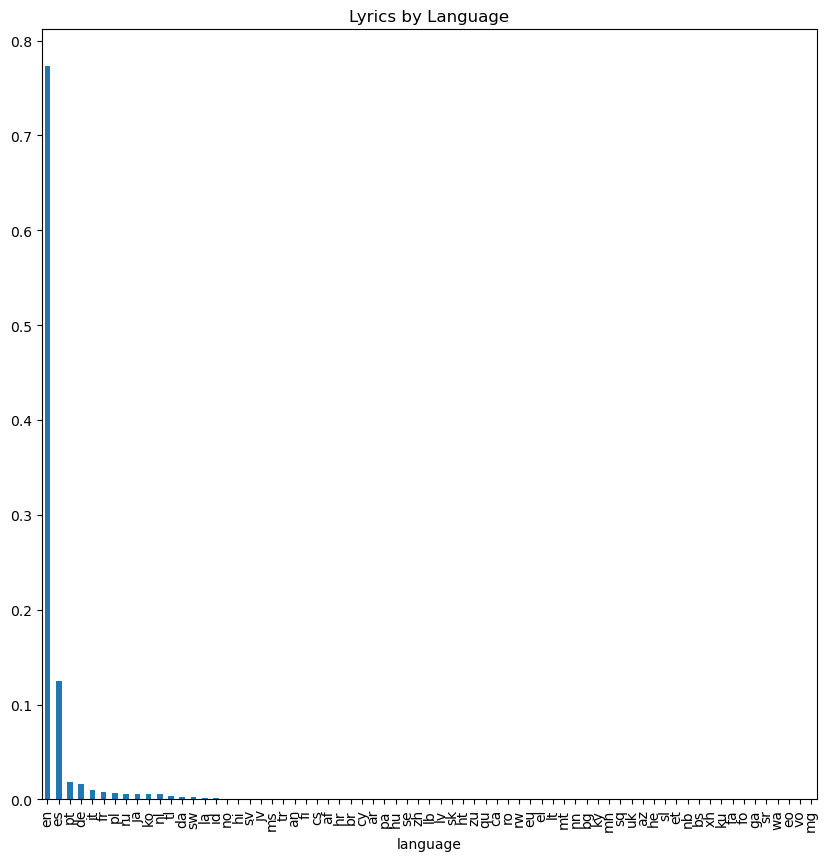

In [7]:
import matplotlib.pyplot as plt

# let's visualize
plt.figure(figsize=(10,10))
df['language'].value_counts(normalize=True).plot(kind='bar')
plt.title('Lyrics by Language')
plt.show()

In [8]:
df['language'].value_counts(normalize=True)

language
en    0.773267
es    0.125106
pt    0.017972
de    0.016320
it    0.009412
        ...   
sr    0.000050
wa    0.000050
eo    0.000050
vo    0.000050
mg    0.000050
Name: proportion, Length: 69, dtype: float64

In [9]:
df[df['language']=='en']['track_popularity'].mean() # English songs have a mean popularity score of 41.6

41.64223747248479

In [10]:
df[df['language']=='es']['track_popularity'].mean() # Spanish songs have a mean popularity score of 47.1

47.10844337735094

In [11]:
df[df['language']=='pt']['track_popularity'].mean() # Portuguese songs have a mean popularity score of 51.2

51.25626740947075

For the top three languages in the data in terms of frequency, I will create one-hot encoded columns. For the rest, I will categorize them as 'Other' and drop this feature to prevent multicolinearity.

In [12]:
# first make a new column with the four new categories
df['lang_cat'] = df['language'].map({'en': 'English', 'es': 'Spanish', 'pt': 'Portuguese'})
# fill the nulls with Other to create the Other category
df['lang_cat'].fillna('Other', inplace=True)
df.columns

Index(['track_id', 'track_lyrics', 'gpt_ratings', 'ratings_length',
       'rating_counts', 'Clear', 'Relatable', 'Memorable', 'Engaging',
       'Symbolic', 'Lyrical', 'Happy', 'Surprised', 'Fearful', 'Angry',
       'Disgusted', 'Sad', 'track_popularity', 'danceability', 'loudness',
       'mode', 'valence', 'tempo', 'duration_ms', 'album_release_quarter_1',
       'album_release_quarter_3', 'album_release_quarter_4',
       'album_decade_1960', 'album_decade_1970', 'album_decade_1980',
       'album_decade_1990', 'album_decade_2000', 'album_decade_2010',
       'album_decade_2020', 'playlist_subgenre_album rock',
       'playlist_subgenre_big room', 'playlist_subgenre_classic rock',
       'playlist_subgenre_dance pop', 'playlist_subgenre_electro house',
       'playlist_subgenre_electropop', 'playlist_subgenre_gangster rap',
       'playlist_subgenre_hard rock', 'playlist_subgenre_hip hop',
       'playlist_subgenre_hip pop', 'playlist_subgenre_indie poptimism',
       'playlist_su

In [13]:
df['lang_cat'].unique() # check the categories

array(['English', 'Other', 'Spanish', 'Portuguese'], dtype=object)

In [14]:
df = pd.get_dummies(df, columns=['lang_cat'], prefix='lang') # create one-hot encoded columns
df.columns

Index(['track_id', 'track_lyrics', 'gpt_ratings', 'ratings_length',
       'rating_counts', 'Clear', 'Relatable', 'Memorable', 'Engaging',
       'Symbolic', 'Lyrical', 'Happy', 'Surprised', 'Fearful', 'Angry',
       'Disgusted', 'Sad', 'track_popularity', 'danceability', 'loudness',
       'mode', 'valence', 'tempo', 'duration_ms', 'album_release_quarter_1',
       'album_release_quarter_3', 'album_release_quarter_4',
       'album_decade_1960', 'album_decade_1970', 'album_decade_1980',
       'album_decade_1990', 'album_decade_2000', 'album_decade_2010',
       'album_decade_2020', 'playlist_subgenre_album rock',
       'playlist_subgenre_big room', 'playlist_subgenre_classic rock',
       'playlist_subgenre_dance pop', 'playlist_subgenre_electro house',
       'playlist_subgenre_electropop', 'playlist_subgenre_gangster rap',
       'playlist_subgenre_hard rock', 'playlist_subgenre_hip hop',
       'playlist_subgenre_hip pop', 'playlist_subgenre_indie poptimism',
       'playlist_su

In [15]:
df.drop(columns=['lang_Other'], inplace=True)
df.columns

Index(['track_id', 'track_lyrics', 'gpt_ratings', 'ratings_length',
       'rating_counts', 'Clear', 'Relatable', 'Memorable', 'Engaging',
       'Symbolic', 'Lyrical', 'Happy', 'Surprised', 'Fearful', 'Angry',
       'Disgusted', 'Sad', 'track_popularity', 'danceability', 'loudness',
       'mode', 'valence', 'tempo', 'duration_ms', 'album_release_quarter_1',
       'album_release_quarter_3', 'album_release_quarter_4',
       'album_decade_1960', 'album_decade_1970', 'album_decade_1980',
       'album_decade_1990', 'album_decade_2000', 'album_decade_2010',
       'album_decade_2020', 'playlist_subgenre_album rock',
       'playlist_subgenre_big room', 'playlist_subgenre_classic rock',
       'playlist_subgenre_dance pop', 'playlist_subgenre_electro house',
       'playlist_subgenre_electropop', 'playlist_subgenre_gangster rap',
       'playlist_subgenre_hard rock', 'playlist_subgenre_hip hop',
       'playlist_subgenre_hip pop', 'playlist_subgenre_indie poptimism',
       'playlist_su

Let's save the data to a csv before dropping some more columns.

In [16]:
df.to_csv('../datasets/merged_data.csv') # save the data to a csv

We do not need `track_lyrics`, `language`, `gpt_ratings`, `ratings_length`, `rating_counts` here. Let's drop them.

In [17]:
# drop these columns
df = df.drop(columns=['track_lyrics', 'language', 'gpt_ratings', 'ratings_length', 'rating_counts']) 
df.shape[1] # return number of columns 

71

Let's make the `track_id` the index column.

In [18]:
pd.set_option('display.max_columns', None) # enable scrolling and seeing all the columns

In [19]:
df.set_index('track_id', inplace=True) # set track_id as index column
df.head() # check the first 5 rows

,Clear,Relatable,Memorable,Engaging,Symbolic,Lyrical,Happy,Surprised,Fearful,Angry,Disgusted,Sad,track_popularity,danceability,loudness,mode,valence,tempo,duration_ms,album_release_quarter_1,album_release_quarter_3,album_release_quarter_4,album_decade_1960,album_decade_1970,album_decade_1980,album_decade_1990,album_decade_2000,album_decade_2010,album_decade_2020,playlist_subgenre_album rock,playlist_subgenre_big room,playlist_subgenre_classic rock,playlist_subgenre_dance pop,playlist_subgenre_electro house,playlist_subgenre_electropop,playlist_subgenre_gangster rap,playlist_subgenre_hard rock,playlist_subgenre_hip hop,playlist_subgenre_hip pop,playlist_subgenre_indie poptimism,playlist_subgenre_latin hip hop,playlist_subgenre_latin pop,playlist_subgenre_neo soul,playlist_subgenre_new jack swing,playlist_subgenre_permanent wave,playlist_subgenre_pop edm,playlist_subgenre_post-teen pop,playlist_subgenre_progressive electro house,playlist_subgenre_southern hip hop,playlist_subgenre_trap,playlist_subgenre_tropical,playlist_subgenre_urban contemporary,key_0,key_1,key_2,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,log_speechiness,log_acousticness,log_instrumentalness,log_liveness,lang_English,lang_Portuguese,lang_Spanish
track_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0r7CVbZTWZgbTCYdfa2P31,9,8,9,8,7,9,7,6,5,4,5,8,67,0.726,-4.969,1,0.693,99.972,162600,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-3.288762,-2.625549,-5.470293,-1.030020,True,False,False
1z1Hg7Vb0AhHDiEmnDE79l,8,6,8,7,5,8,4,6,5,4,5,7,70,0.675,-3.432,0,0.613,124.008,176616,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,-2.600991,-2.533257,-10.667053,-2.207275,True,False,False
75FpbthrwQmzHlBJLuGdC7,9,8,9,8,7,9,8,6,5,4,5,8,60,0.718,-3.778,1,0.277,121.956,169093,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,-2.282783,-3.550858,-11.571604,-1.589635,True,False,False
1e8PAfcKUYoKkxPhrHqw4x,9,8,9,8,7,9,3,5,2,2,3,9,69,0.650,-4.672,1,0.725,123.976,189052,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,-3.327018,-2.521985,-23.025850,-2.485307,True,False,False
7fvUMiyapMsRRxr07cU8Ef,9,8,9,8,7,9,6,4,3,3,4,7,67,0.675,-5.385,1,0.585,124.982,163049,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,-2.063568,-2.526979,-23.025850,-1.944911,True,False,False


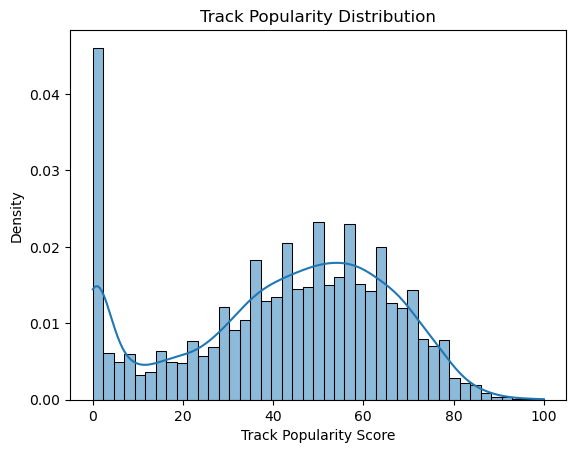

In [20]:
#let's visualize track_popularity
plt.figure()
sns.histplot(df['track_popularity'], kde=True, stat='density')
plt.title('Track Popularity Distribution')
plt.xlabel('Track Popularity Score')
plt.show()

The distribution of track popularity scores is similar to how it was before; there are a lot of very low scores.

Let's look at the distribution of the gpt scores.

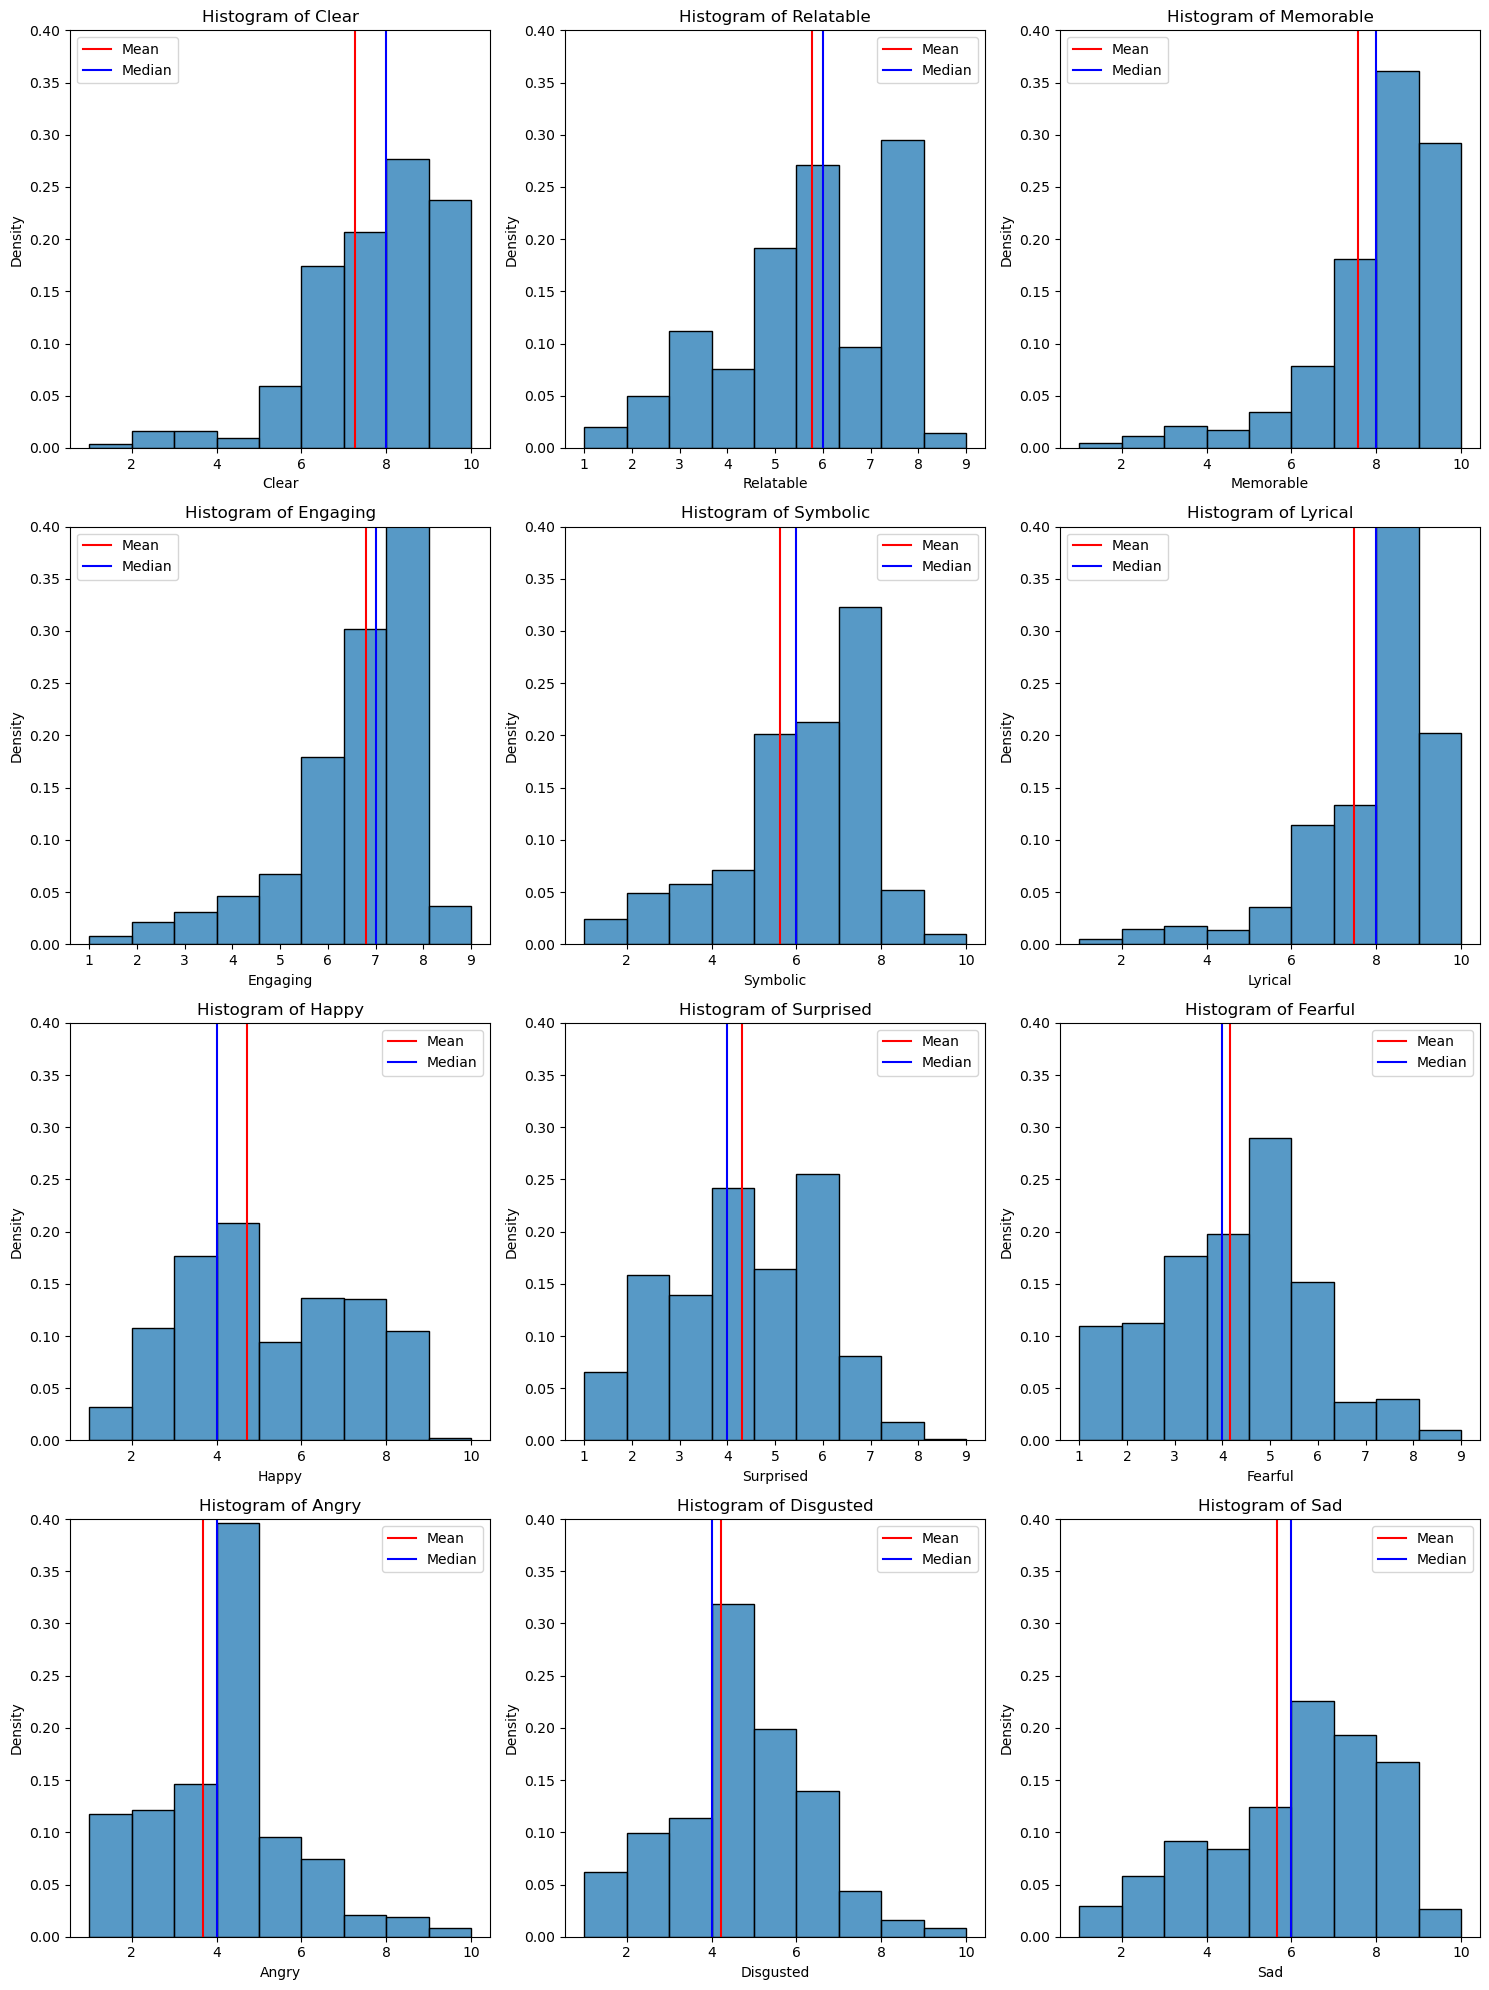

In [21]:
rating_cols = ['Clear', 'Relatable', 'Memorable', 'Engaging', 'Symbolic','Lyrical', 'Happy', 'Surprised', 
               'Fearful', 'Angry', 'Disgusted', 'Sad']

plt.subplots(4,3, figsize=(15,20))

for i, col in enumerate(rating_cols):
    plt.subplot(4,3,i+1)
    sns.histplot(df[col], bins=9, stat='density')
    plt.axvline(df[col].mean(), label="Mean", color='red')
    plt.axvline(df[col].median(), label="Median", color='blue')
    plt.ylim(0, 0.4)
    plt.title(f'Histogram of {col}')
    plt.legend()

plt.tight_layout()
plt.show()

Scores for the first 6 criteria seem a bit left skewed while the rest are more normally-distributed looking.

Let's also visualize how mean popularity score changes by each score. 

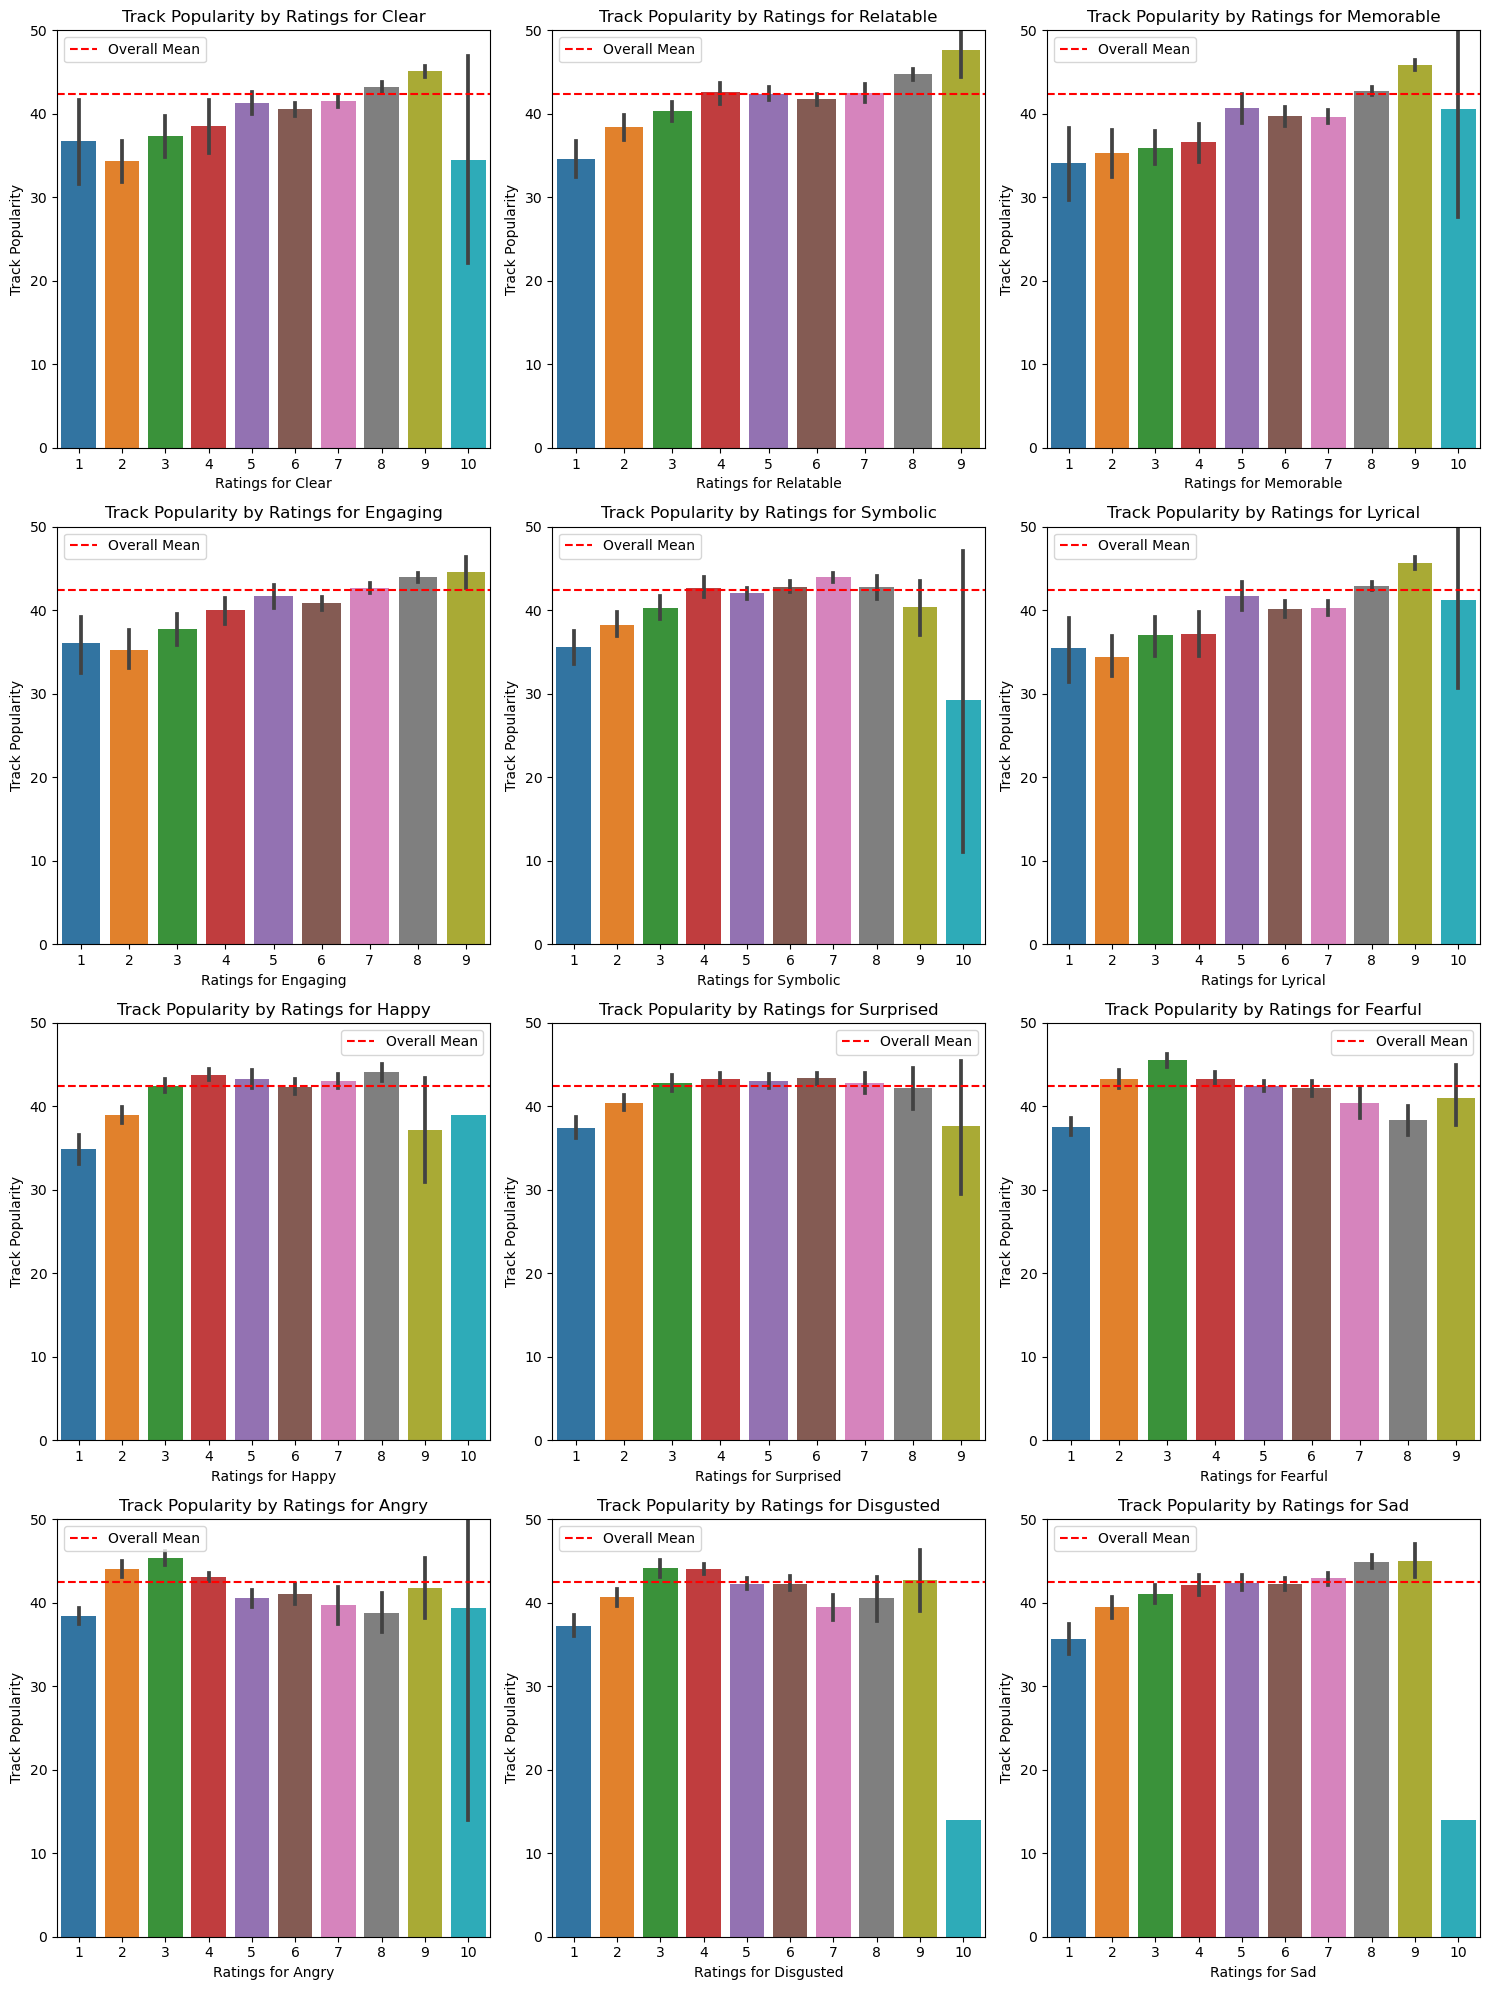

In [22]:
rating_cols = ['Clear', 'Relatable', 'Memorable', 'Engaging', 'Symbolic','Lyrical', 'Happy', 'Surprised', 
               'Fearful', 'Angry', 'Disgusted', 'Sad']

plt.subplots(4,3, figsize=(15,20))

for i, col in enumerate(rating_cols):
    plt.subplot(4,3,i+1)
    sns.barplot(x=col, y='track_popularity', data=df, estimator='mean')
    plt.axhline(y=df['track_popularity'].mean(), color='r', linestyle='--', label='Overall Mean')
    plt.title(f'Track Popularity by Ratings for {col}')
    plt.xlabel(f'Ratings for {col}')
    plt.ylabel('Track Popularity')
    plt.ylim(0, 50)
    plt.legend()

plt.tight_layout()
plt.show()

As scores for being clear, relatable, memorable, engaging, lyrical increase, track popularity means also increase. The trends are not so clear with others. Let's look at correlations on a heatmap.

In [26]:
df1 = df.copy() # copy the dataframe
df1.shape # check the shape

(19975, 70)

In [27]:
df1_corrs = df1.corr() # get the correlations
 
mask = np.triu(df1_corrs) # get the mask for better readability

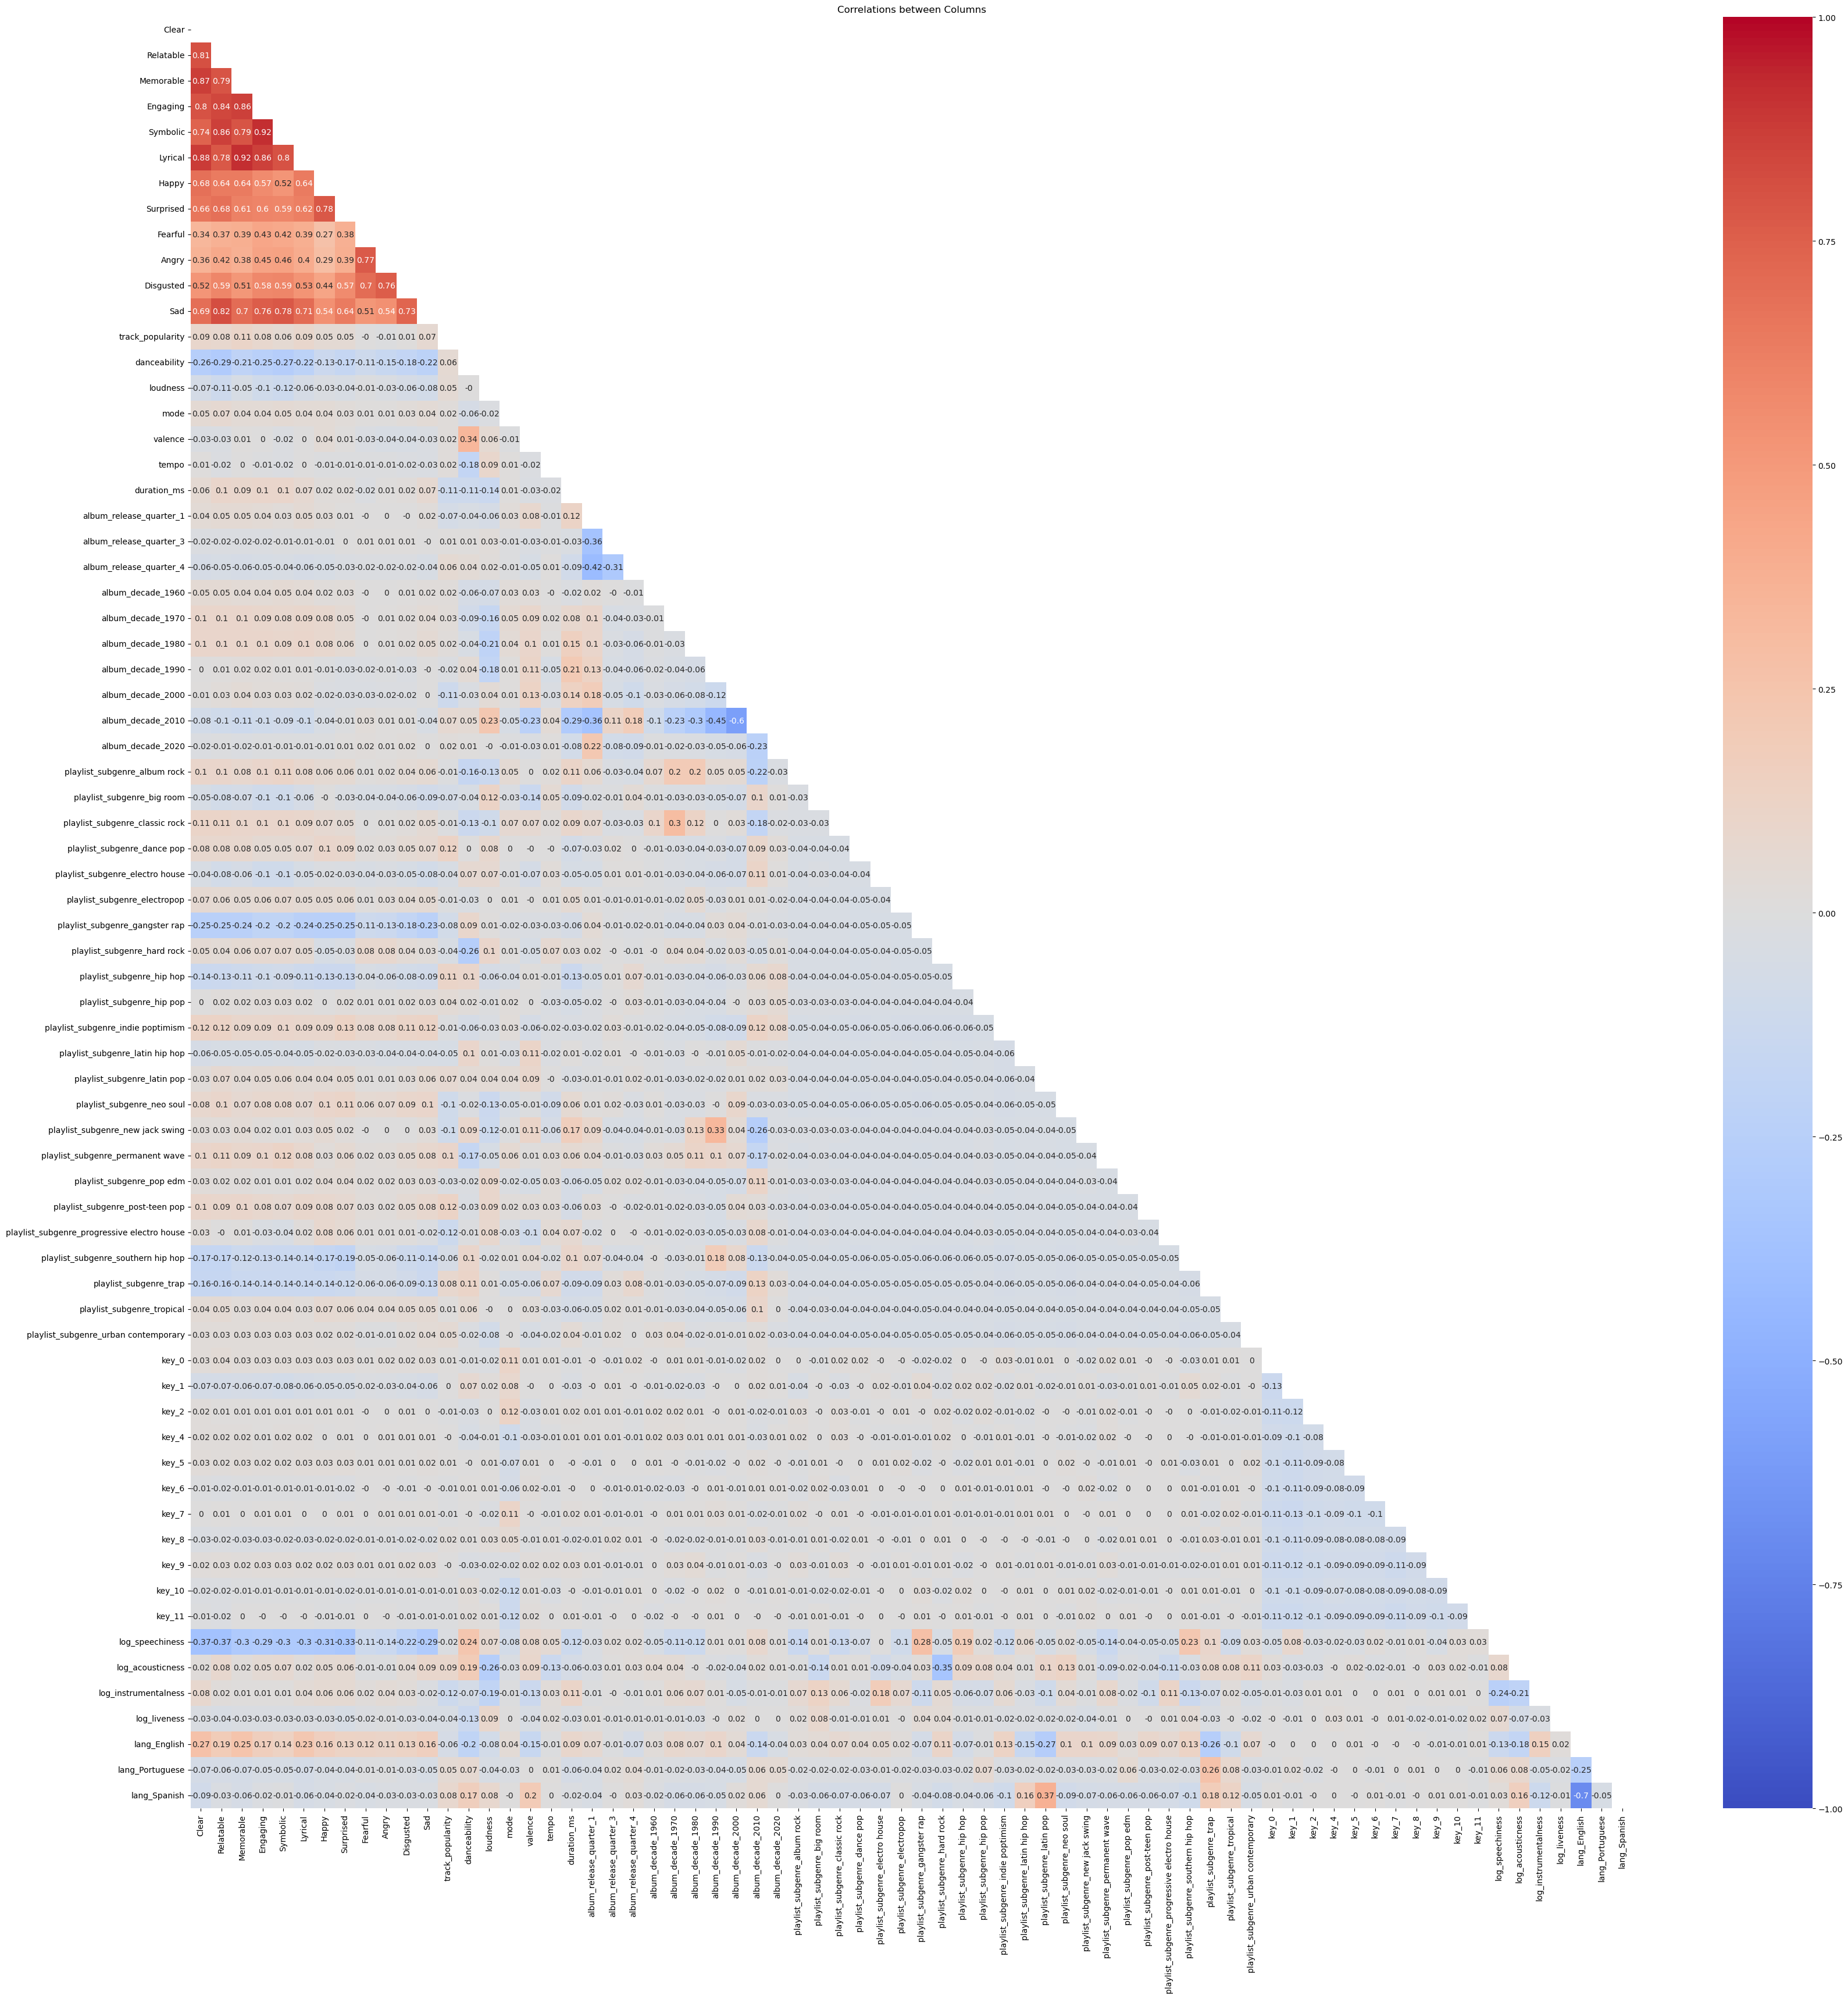

In [28]:
# visualize the correlations with a heatmap

plt.figure(figsize=(40,40))
plt.title('Correlations between Columns')
sns.heatmap(df1_corrs.round(2), mask=mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

Let's only focus on those below -0.2 or above 0.2.

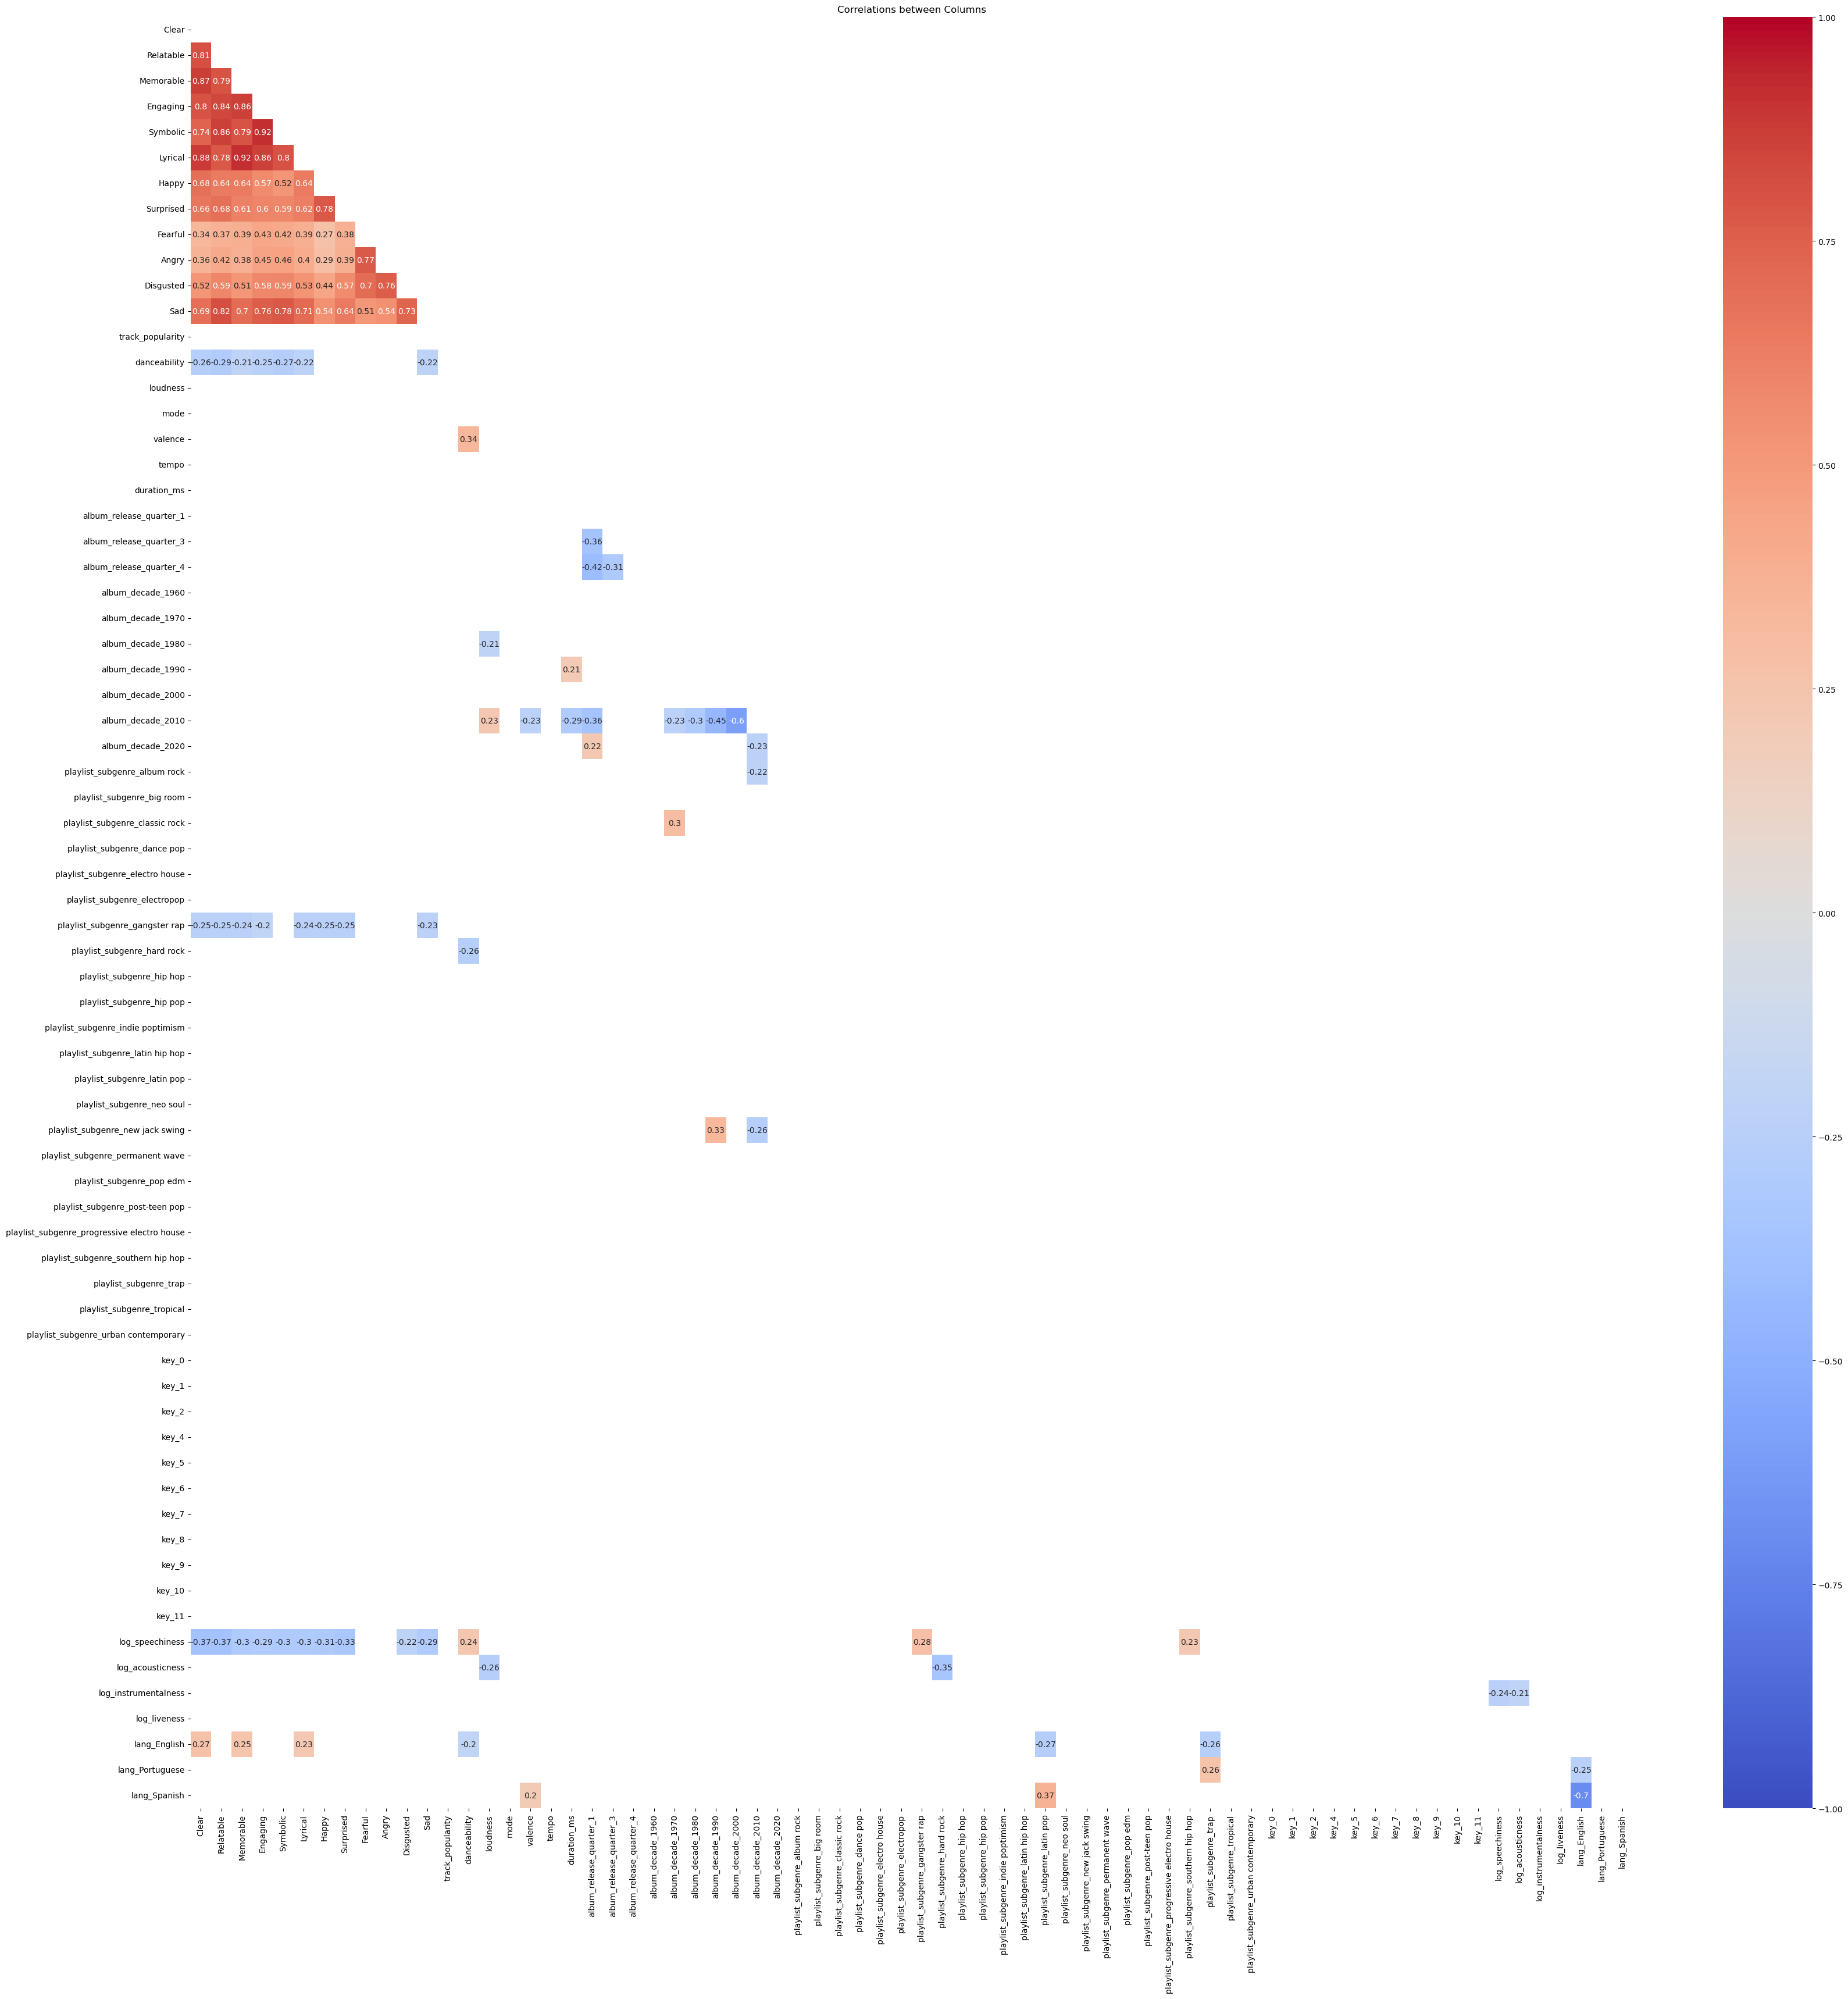

In [29]:
# visualize the correlations with a heatmap

plt.figure(figsize=(40,40))
plt.title('Correlations between Columns')
sns.heatmap(df1_corrs[(df1_corrs >=0.2) | (df1_corrs <= -0.2)].round(2), mask=mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

Still, not easy to read. Maybe a dataframe is better?

In [30]:
interesting_corrs = df1_corrs[(df1_corrs >=0.2) | (df1_corrs <= -0.2)].round(2)
interesting_corrs.head(10)

,Clear,Relatable,Memorable,Engaging,Symbolic,Lyrical,Happy,Surprised,Fearful,Angry,Disgusted,Sad,track_popularity,danceability,loudness,mode,valence,tempo,duration_ms,album_release_quarter_1,album_release_quarter_3,album_release_quarter_4,album_decade_1960,album_decade_1970,album_decade_1980,album_decade_1990,album_decade_2000,album_decade_2010,album_decade_2020,playlist_subgenre_album rock,playlist_subgenre_big room,playlist_subgenre_classic rock,playlist_subgenre_dance pop,playlist_subgenre_electro house,playlist_subgenre_electropop,playlist_subgenre_gangster rap,playlist_subgenre_hard rock,playlist_subgenre_hip hop,playlist_subgenre_hip pop,playlist_subgenre_indie poptimism,playlist_subgenre_latin hip hop,playlist_subgenre_latin pop,playlist_subgenre_neo soul,playlist_subgenre_new jack swing,playlist_subgenre_permanent wave,playlist_subgenre_pop edm,playlist_subgenre_post-teen pop,playlist_subgenre_progressive electro house,playlist_subgenre_southern hip hop,playlist_subgenre_trap,playlist_subgenre_tropical,playlist_subgenre_urban contemporary,key_0,key_1,key_2,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,log_speechiness,log_acousticness,log_instrumentalness,log_liveness,lang_English,lang_Portuguese,lang_Spanish
Clear,1.00,0.81,0.87,0.80,0.74,0.88,0.68,0.66,0.34,0.36,0.52,0.69,NaN,-0.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.37,NaN,NaN,NaN,0.27,NaN,NaN
Relatable,0.81,1.00,0.79,0.84,0.86,0.78,0.64,0.68,0.37,0.42,0.59,0.82,NaN,-0.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.37,NaN,NaN,NaN,NaN,NaN,NaN
Memorable,0.87,0.79,1.00,0.86,0.79,0.92,0.64,0.61,0.39,0.38,0.51,0.70,NaN,-0.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.30,NaN,NaN,NaN,0.25,NaN,NaN
Engaging,0.80,0.84,0.86,1.00,0.92,0.86,0.57,0.60,0.43,0.45,0.58,0.76,NaN,-0.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.29,NaN,NaN,NaN,NaN,NaN,NaN
Symbolic,0.74,0.86,0.79,0.92,1.00,0.80,0.52,0.59,0.42,0.46,0.59,0.78,NaN,-0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.30,NaN,NaN,NaN,NaN,NaN,NaN
Lyrical,0.88,0.78,0.92,0.86,0.80,1.00,0.64,0.62,0.39,0.40,0.53,0.71,NaN,-0.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.30,NaN,NaN,NaN,0.23,NaN,NaN
Happy,0.68,0.64,0.64,0.57,0.52,0.64,1.00,0.78,0.27,0.29,0.44,0.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.31,NaN,NaN,NaN,NaN,NaN,NaN
Surprised,0.66,0.68,0.61,0.60,0.59,0.62,0.78,1.00,0.38,0.39,0.57,0.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.33,NaN,NaN,NaN,NaN,NaN,NaN
Fearful,0.34,0.37,0.39,0.43,0.42,0.39,0.27,0.38,1.00,0.77,0.70,0.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Angry,0.36,

Gpt scores seem to be highly correlated with each other. Let's take a closer look at them.

In [31]:
ratings = ['track_popularity', 'Clear', 'Relatable', 'Memorable', 'Engaging', 'Symbolic', 'Lyrical', 'Happy', 
           'Surprised', 'Fearful', 'Angry', 'Disgusted', 'Sad']

df2 = df1[ratings]

df2_corrs = df2.corr() # get the correlations
 
mask = np.triu(df2_corrs) # get the mask for better readability

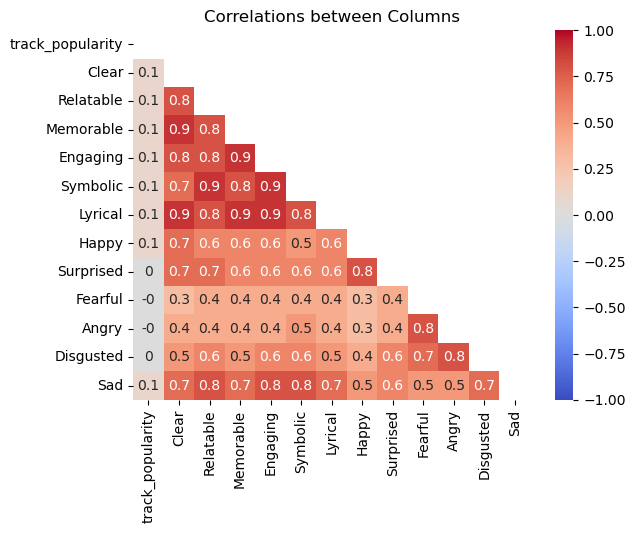

In [34]:
# visualize the correlations with a heatmap

plt.figure()
plt.title('Correlations between Columns')
sns.heatmap(df2_corrs.round(1), mask=mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

Let's add some more columns.

In [35]:
more_columns = ['Clear', 'Relatable', 'Memorable', 'Engaging', 'Symbolic', 'Lyrical',
       'Happy', 'Surprised', 'Fearful', 'Angry', 'Disgusted', 'Sad',
       'track_popularity', 'danceability', 'loudness', 'mode', 'valence', 'tempo',
       'duration_ms', 'log_speechiness', 'log_acousticness',
       'log_instrumentalness', 'log_liveness', 'lang_English',
       'lang_Portuguese', 'lang_Spanish']

df3 = df1[more_columns]

df3_corrs = df3.corr() # get the correlations
 
mask = np.triu(df3_corrs) # get the mask for better readability

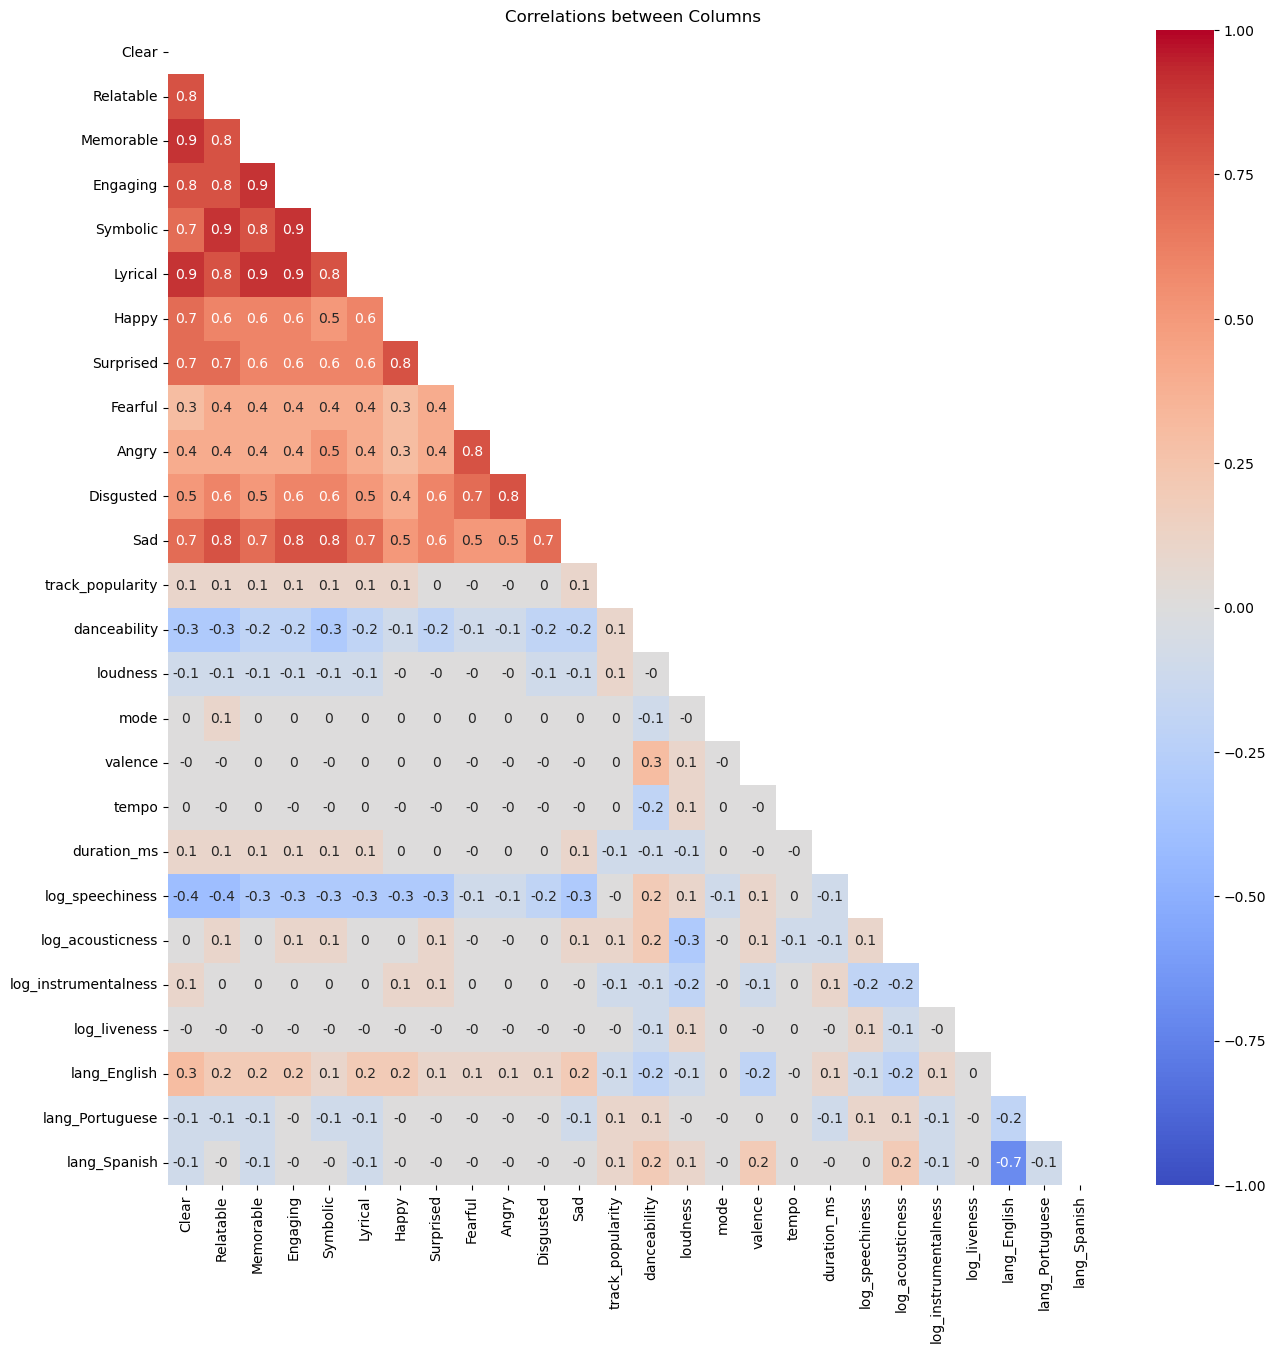

In [36]:
# visualize the correlations with a heatmap

plt.figure(figsize=(15,15))
plt.title('Correlations between Columns')
sns.heatmap(df3_corrs.round(1), mask=mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

In [37]:
df.columns

Index(['Clear', 'Relatable', 'Memorable', 'Engaging', 'Symbolic', 'Lyrical',
       'Happy', 'Surprised', 'Fearful', 'Angry', 'Disgusted', 'Sad',
       'track_popularity', 'danceability', 'loudness', 'mode', 'valence',
       'tempo', 'duration_ms', 'album_release_quarter_1',
       'album_release_quarter_3', 'album_release_quarter_4',
       'album_decade_1960', 'album_decade_1970', 'album_decade_1980',
       'album_decade_1990', 'album_decade_2000', 'album_decade_2010',
       'album_decade_2020', 'playlist_subgenre_album rock',
       'playlist_subgenre_big room', 'playlist_subgenre_classic rock',
       'playlist_subgenre_dance pop', 'playlist_subgenre_electro house',
       'playlist_subgenre_electropop', 'playlist_subgenre_gangster rap',
       'playlist_subgenre_hard rock', 'playlist_subgenre_hip hop',
       'playlist_subgenre_hip pop', 'playlist_subgenre_indie poptimism',
       'playlist_subgenre_latin hip hop', 'playlist_subgenre_latin pop',
       'playlist_subgenre_neo s

These are all the features except for one-hot encoded album decades, album release quarters, and keys. These are excluded for better readability. 

In the next notebook, I build neural network and linear regression models. For the linear regression models, I will use VIF to deal with multicolinearity.